In [7]:
from MacArthurModel import MacArther_C_R_2, Mit_Invader, create_parameter
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("./styles/mystyle.mplstyle")

# Example Plot 1 MacArthur Consumer Resource Model

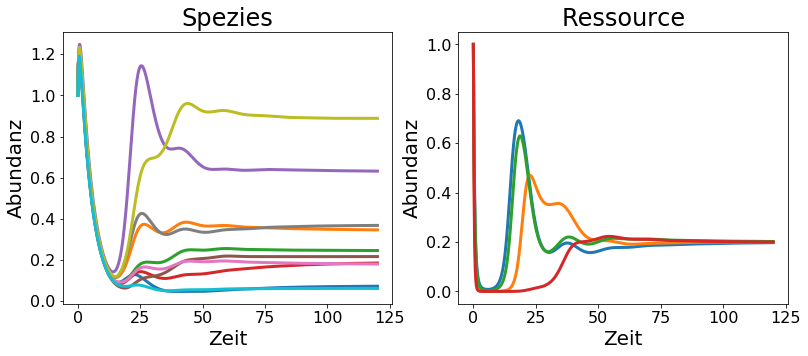

In [27]:
p_dict = create_parameter(10,4)  #30,40

t = np.linspace(0,120,1000)
wieviele_invader = 1

Task3 = MacArther_C_R_2(p_dict)   # Viele Spezies und Ressourcen klappen nicht -> NoneType kommt raus => Um das zu beheben, muss Threshold in steadystate aus Klasse Task3 vergrößert werden
                                         
R0 = np.repeat(1,Task3.number_resources)
X0 = np.repeat(1,Task3.number_species)
y0 = np.concatenate((X0,R0),axis=None)

plt.ylabel("Abundanz")
plt.xlabel("Zeit")
plt.plot(t,Task3.timecourse(y0,t))

#fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,10))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,5))
vor_invasion = Task3.timecourse(y0,t)


axes[0].plot(t,vor_invasion[ : , :Task3.number_species])
axes[1].plot(t,vor_invasion[ : , Task3.number_species:])

axes[0].set_title("Spezies")
axes[0].set(xlabel='Zeit', ylabel='Abundanz')
axes[1].set_title("Ressource")
axes[1].set(xlabel='Zeit', ylabel='Abundanz')


# axes[0,0].plot(t,vor_invasion[ : , :Task3.number_species])
# axes[0,1].plot(t,vor_invasion[ : , Task3.number_species:])

# axes[0,0].set_title("Spezies")
# axes[0,0].set(xlabel='Zeit', ylabel='Abundanz')
# axes[0,1].set_title("Ressource")
# axes[0,1].set(xlabel='Zeit', ylabel='Abundanz')

# k = Task3.steadystate(y0)
# plt.plot(t,Task3.timecourse(k,t))

# vor_invasion_mit_ss = Task3.timecourse(k,t)
# axes[1,0].plot(t,vor_invasion_mit_ss[ : , :Task3.number_species])
# axes[1,1].plot(t,vor_invasion_mit_ss[ : , Task3.number_species:])

# axes[1,0].set_title("Spezies")
# axes[1,0].set(xlabel='Zeit', ylabel='Abundanz')
# axes[1,1].set_title("Ressource")
# axes[1,1].set(xlabel='Zeit', ylabel='Abundanz')
# plt.ylabel("Abundanz")
# plt.xlabel("Zeit")
# plt.tight_layout()

#plt.savefig("img/MacArthurConsumerRessourceModell_example1(10S,4R).png")      # <-----------------------------------

plt.show()

# 3.2 Auswirkung Parametervariation

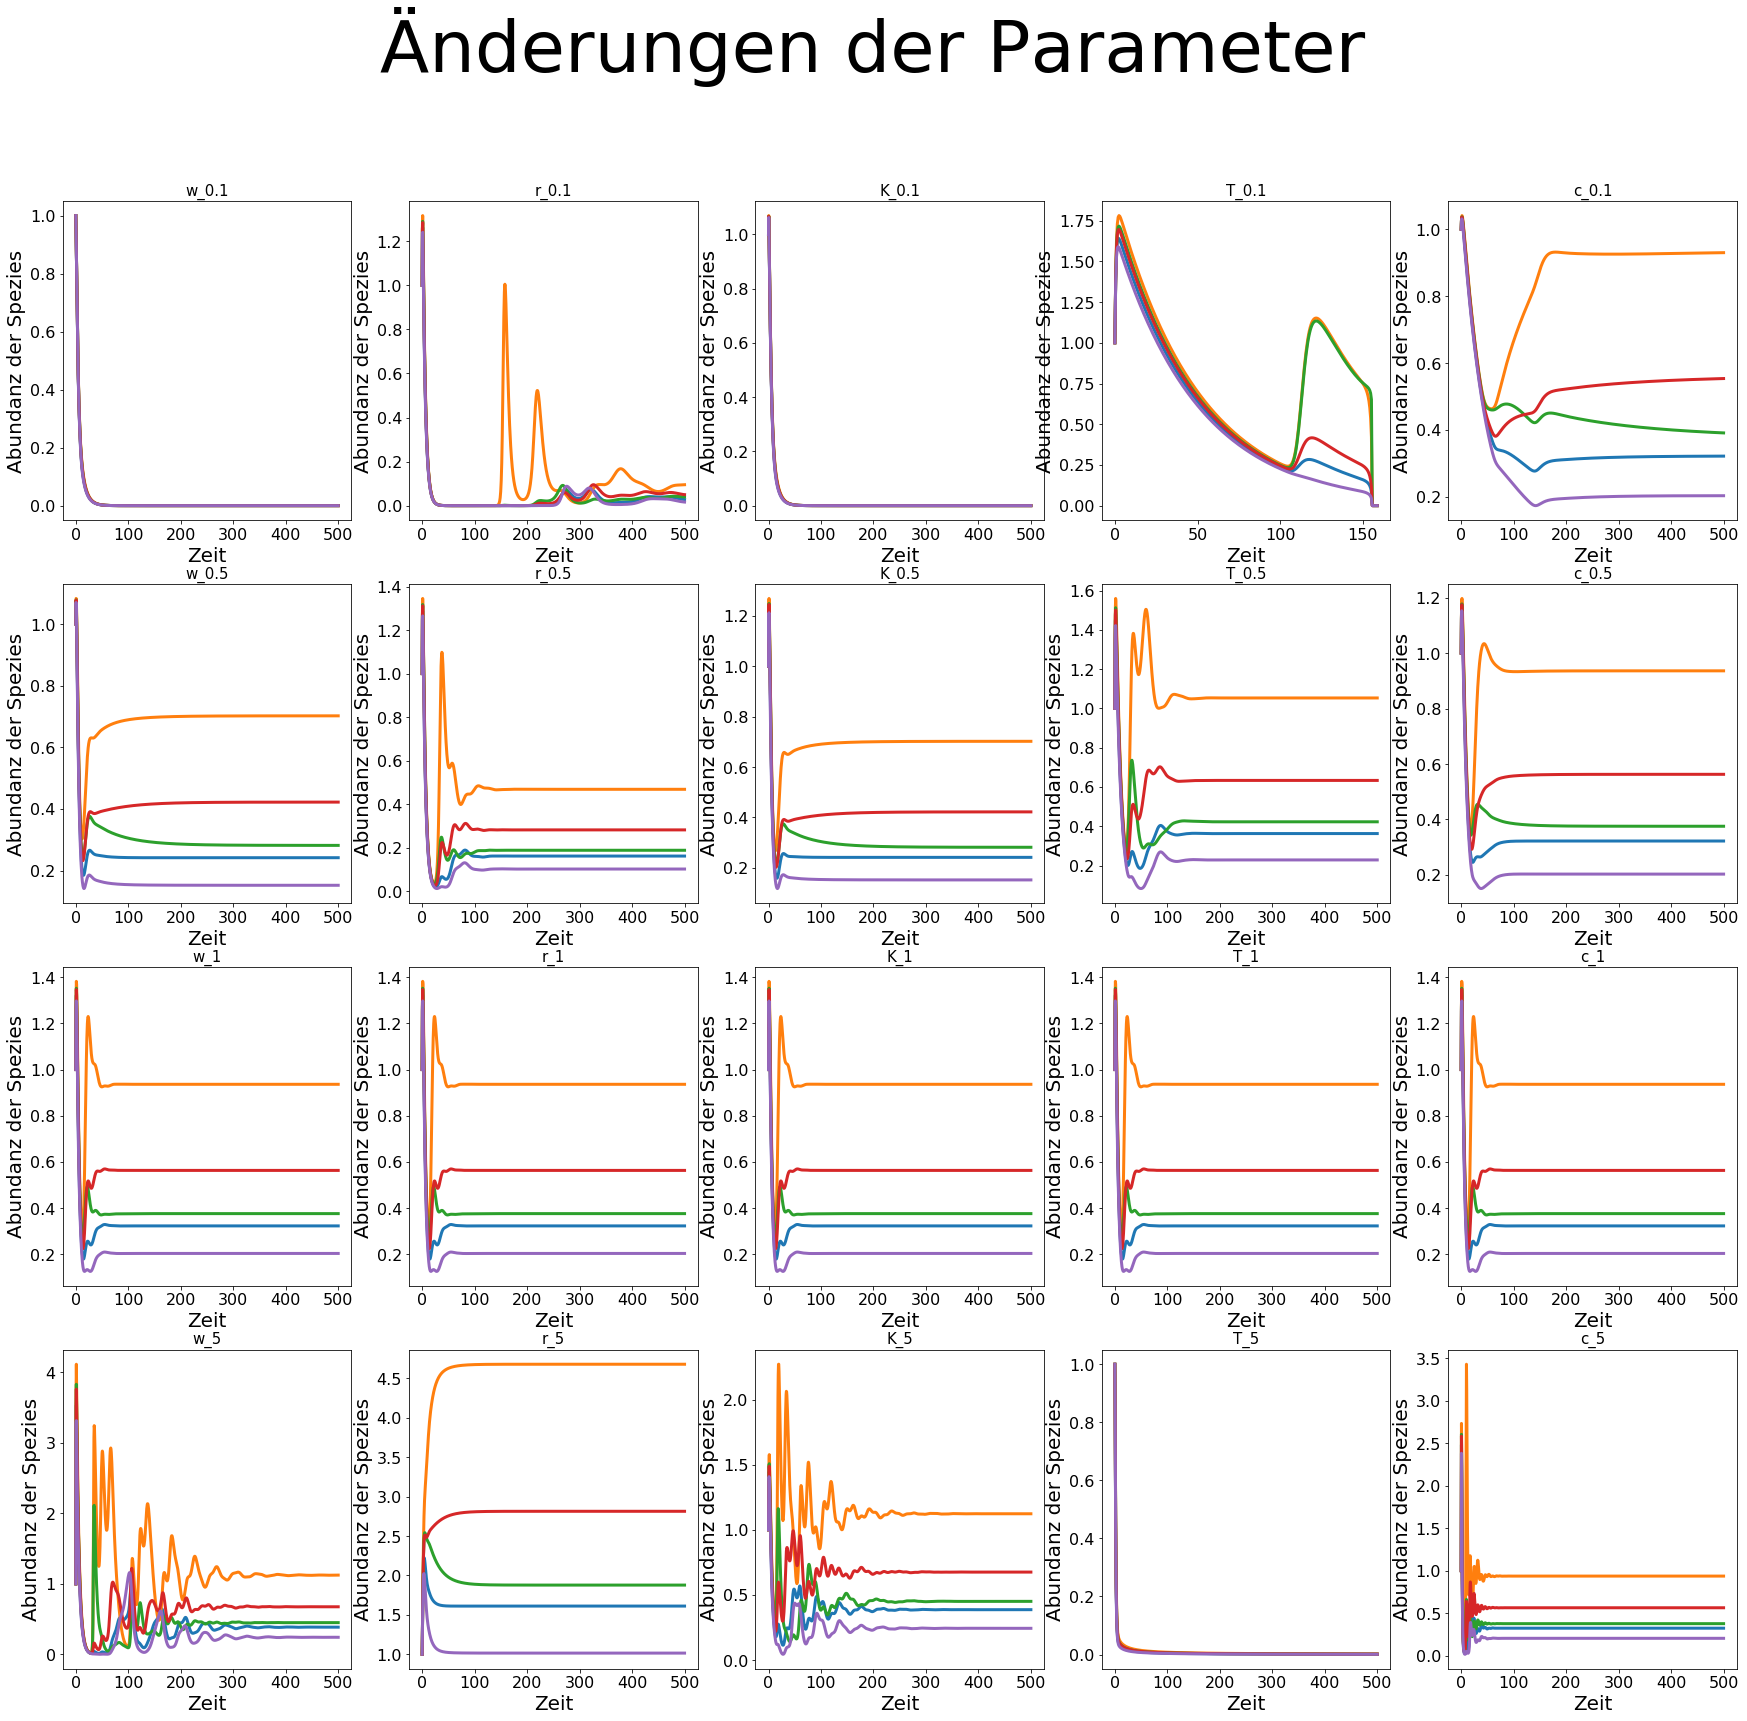

In [6]:
p_dict = create_parameter(5,3)

t = np.linspace(0,500,1000)

Modell32 = MacArther_C_R_2(p_dict)   # Viele Spezies und Ressourcen klappen nicht -> NoneType kommt raus => Um das zu beheben, muss Threshold in steadystate aus Klasse Task3 vergrößert werden
                                         
R0 = np.repeat(1,Modell32.number_resources)
X0 = np.repeat(1,Modell32.number_species)
y0 = np.concatenate((X0,R0),axis=None)

parameter = ["w","r","K","T","c"]
faktoren = [0.1,0.5,1,5]

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(30,27))

for i in range(len(parameter)):
    org_p = getattr (Modell32,parameter[i])
    for j in range(len(faktoren)):
        setattr(Modell32, parameter[i], org_p * faktoren[j])
        res = Modell32.timecourse(y0, t)
        setattr(Modell32, parameter[i], org_p)
        axes[j,i].plot(t, res[:,:Modell32.number_species])
        axes[j,i].set_title(parameter[i] + "_" + str(faktoren[j]),size=15)
        axes[j,i].set(xlabel="Zeit",ylabel="Abundanz der Spezies")
        
plt.tight_layout        
fig.suptitle("Änderungen der Parameter",fontsize = 72)#,fontweight="bold")
#plt.savefig("img/MacArthurConsumerRessourceModell_neueParameter.png")

plt.show()

    
    #print(org_p)
#Achsenbeschriftung fehlt

In [4]:
print(Modell32.c)


[1 1 1 1 1]


# 3.3: Nahrungsnetzwerk Matrix

In [8]:
#Creating functions for the next cell

def entropie (a,basis = 5):
    """Diese Funktion soll die Shannon Entropie anhand der eingegeben Matrix (a) errechnen und die Entropie normiert ausgeben. 
        Das Attribut 'basis' dient dazu, um die den Logarithmus zu wechseln. """
    count = 0
    for i in a:
        en = -np.sum(i*np.log2(i)/np.log2(basis))
        count += en
        #print(en)
    H = count/len(a)   
    return H    


def random_generalist(matrix):   
    """Diese Funktion soll eine Matrix als Argument bekommen, die dann in Zeile(n) und Spalte(n) unterteilt wird. Anschließend 
    sollen Zeile(n) und Spalten(n) multipliziert werden, damit man eine Grenze für die zufällige Auswahl für den zu ersetzenden 
    Index in der eingegebenen Matrix erhält."""
    matrix_form = np.shape(matrix)
    spalte = matrix_form[1]
    reihe = matrix_form[0]
    b = np.random.choice(spalte * reihe)
    idx1 = np.random.choice(range(reihe),b)
    idx2 = np.random.choice(range(spalte),b)
    idx = list(zip(idx1,idx2))
    for i in idx:
        matrix[i] = 1e-10
    matrix = matrix/matrix.sum(axis=1,keepdims=1)
    return matrix

def random_generalist_invader(matrix): ###############
    """Diese Funktion diesn als Erweiterung für die random_generalist-Funktion. Hier wird der Invader entweder zum Spezialisten 
    oder Generalisten. Die if-Bedingung dient dazu, dass der Invasor enteweder wie die anderen zum Spezialismus oder zum Generalismus neigen soll"""
    if np.random.randint(2) == 1:
        matrix_form = np.shape(matrix)
        reihe = matrix_form[1]
        b = np.random.choice(reihe)
        d = np.random.choice(range(reihe),b) 
        for i in d:
            matrix[-1][i] = 1e-10
        anhaengen = matrix[-1]/matrix[-1].sum(axis=0,keepdims=1)
        matrix[-1]=anhaengen
    else:
        matrix = matrix
    return matrix
    

def ueberlebt(steadystates, threshold=1e-3):
    """Die Funktion soll die Anzahl der überlebenden Spezies herausfinden, indem sie die Steadystates aufzählt. Erst wenn der 
    Steadystate einen bestimmten Schwellwert erreicht hat (threshold), soll dieser Steadystate mitgezählt werden."""
    cnt = sum(steadystates > threshold)
    return cnt

def gestorben(fitness, threshold=1e-3):
    """Funktion soll die Anzahl der verstorbenen Spezies errechnen, indem die Steadystates aufgezählt werden, die unter dem Schwellwert liegen."""
    cnt = sum(fitness < threshold)
    return cnt

def niche_overlap(matrix):
    """Diese Funktion soll die Überlappung der ökologischen Nische berechnen, sodass man herausfinden kann, wie stark sich zwei
    Spezies gegeneinander konkurrieren. """
    einsum = np.einsum("ia, ja -> ij", matrix, matrix)                     
    symmetrie_matrix = einsum[np.triu_indices_from(einsum,k=1)]             
    diagonal = np.diag(einsum)                                     
    diag_multipl = np.outer(diagonal, diagonal)                             
    diag_symmetrie = diag_multipl[np.triu_indices_from(diag_multipl,k=1)]     
    ergebnis = symmetrie_matrix/ np.sqrt(diag_symmetrie)                      
    mittelwert = np.mean(ergebnis)
    #print(ergebnis)
    return mittelwert

def RSS(ss):                                                            #Residual Sum of Squares
    """Diese Funktion soll die Residuenquadratsumme errechnen"""
    ss_durch = np.mean(ss)
    rss = np.sum((ss - ss_durch)**2)
    return rss

In [391]:
b = np.random.rand(4,5)
print("referenz\n", b,"\n")
print(random_generalist_invader(b),"\n")
#print(np.sum(random_generalist_invader(b),axis=1))
laenge = len(b)
zufall = np.random.choice(laenge-(laenge-1),laenge)
for i in zufall:
    b[i] = 1e-10
print(b)
print(np.random.choice(5,5))
# for i in range(5):
#     print(i)

referenz
 [[0.81008264 0.04807302 0.54855687 0.68450307 0.24109552]
 [0.32677541 0.14660096 0.47079937 0.19626857 0.12323043]
 [0.2470042  0.84231272 0.57597396 0.55005442 0.74737632]
 [0.90477089 0.10005269 0.51031849 0.20685612 0.6230564 ]] 

[[0.81008264 0.04807302 0.54855687 0.68450307 0.24109552]
 [0.32677541 0.14660096 0.47079937 0.19626857 0.12323043]
 [0.2470042  0.84231272 0.57597396 0.55005442 0.74737632]
 [0.90477089 0.10005269 0.51031849 0.20685612 0.6230564 ]
 [0.         1.         0.         0.         0.        ]] 

[[0.         0.         0.         0.         0.        ]
 [0.32677541 0.14660096 0.47079937 0.19626857 0.12323043]
 [0.2470042  0.84231272 0.57597396 0.55005442 0.74737632]
 [0.90477089 0.10005269 0.51031849 0.20685612 0.6230564 ]]
[3 4 2 2 3]


In [9]:


ns = 10   #number_species   #26 Spezies testen
nr = 10   #number_resources  #34 Res
# ns und nr als Test

p_dict = create_parameter(ns,nr)  #Spezies und Ressourcen

t = np.linspace(0,500,1000)   # 1000  wird gar nicht gebraucht

Modell33 = MacArther_C_R_2(p_dict)

R0 = np.repeat(1,Modell33.number_resources)
X0 = np.repeat(1,Modell33.number_species)
y0 = np.concatenate((X0,R0),axis=None)

# Einfache Beispiele

1.0


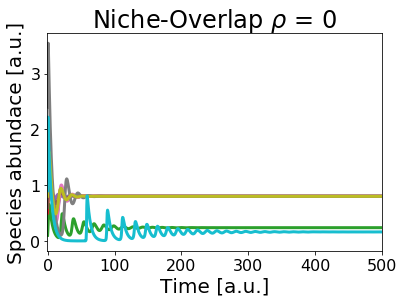

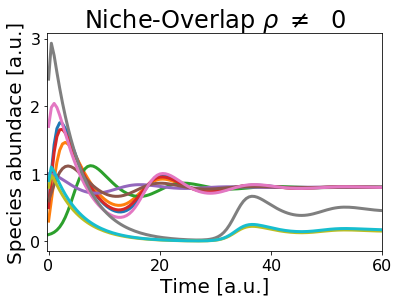

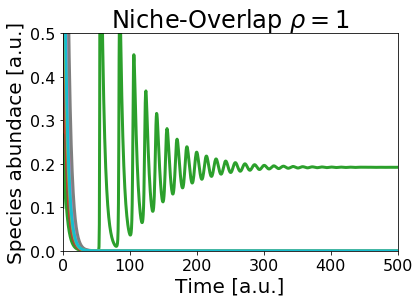

In [4]:
y0 = [0.5,0.3,0.1,0.5, 1.0,0.6,1.7,2.4,0.8,0.9,2.3,2.1,0.4,2.0,0.2,0.6,0.7,1.9,1.2,1.5]  #20 mal

# Niche Overlap
Matrix1 = np.diag(np.ones(10)) #NicheOverlap 0
Matrix1[2,2] =4
Matrix1[9,9] = 6

Matrix2 = np.diag(np.ones(10)) #NicheOverlap von ungleich 0. Letzte drei Spezies absoluter overlap 
Matrix2[-2,-1] = 1
Matrix2[-2,-2] = 0
Matrix2[-3,-1] = 1
Matrix2[-3,-3] = 0


Matrix3 = np.zeros((10,10))
Matrix3[:,0] = np.ones(10)
Matrix3[2,0] = 5
print(niche_overlap(Matrix3))

#Simulation Matrix 1
Modell33.a = Matrix1
res = Modell33.timecourse(y0,t)
plt.plot(t,res[:,:Modell33.number_species])
plt.xlim(-0.2,500)
plt.title(r"Niche-Overlap $\rho$ = 0")
plt.xlabel("Time [a.u.]")
plt.ylabel("Species abundace [a.u.]")
plt.savefig(f"img/Matrix1.png")
plt.show()

#Simulation Matrix2
Modell33.a = Matrix2
res = Modell33.timecourse(y0,t)
species = res[:,:Modell33.number_species]
plt.plot(t,species)
plt.xlim(-0.2,60)
plt.title(r"Niche-Overlap $\rho$ $\neq$  0")
plt.xlabel("Time [a.u.]")
plt.ylabel("Species abundace [a.u.]")
plt.savefig(f"img/Matrix2.png")
plt.show()

#Simulation Matrix3
Modell33.a = Matrix3
res = Modell33.timecourse(y0,t)
species = res[:,:Modell33.number_species]
plt.plot(t,species)
plt.xlim(-0.2,500)
plt.ylim(0,0.5)
plt.title(r"Niche-Overlap $\rho=1$")
plt.xlabel("Time [a.u.]")
plt.ylabel("Species abundace [a.u.]")
plt.savefig(f"img/Matrix3.png")
plt.show()

In [148]:
np.random.uniform(0,0.5,10)

array([0.19408093, 0.4289353 , 0.06771126, 0.00100693, 0.28160192,
       0.21143023, 0.05772812, 0.3245607 , 0.08469951, 0.00344004])

# Big scale

In [12]:
#Calculate Entropy in random matrices
wie_lange = 10

crossfeeding_matrices = [create_parameter(ns,nr)['a'] for _ in range(wie_lange)]   # 10000, # 1000 
gencrossfeeding_matrices = [random_generalist(i) for i in crossfeeding_matrices] #create specialists
ShannonEntropyOfCM = [entropie(i,basis=nr) for i in gencrossfeeding_matrices]
nicheoverlapofCM = [niche_overlap(i) for i in gencrossfeeding_matrices]


In [13]:
# Shannonentropie und Nischenüberlappung
fig, axes = plt.subplots(nrows=1, ncols=2, figsize= (25,7))

axes[0].hist(ShannonEntropyOfCM,bins=50)
axes[0].set_title("Verteilung der Shannonentropie")
axes[0].set(xlabel="Entropie", ylabel="Anzahl der Matrizen")
axes[1].hist(nicheoverlapofCM, bins=50)
axes[1].set_title(r"Verteilung der Überlappung der Nischen $\rho$")
axes[1].set(xlabel="Nischenüberlappung", ylabel="Anzahl Matrizen")
#plt.savefig(f"img/EntropieNachAnzahlDerMatrizenUndNischenüberlappungRange{wie_lange}Und{ns}SUnd{nr}R.png")
plt.show()

print("Korrelation von Entropie und Nischenüberlappung der Matrizen:\n", np.corrcoef(ShannonEntropyOfCM,nicheoverlapofCM),"\n")

Korrelation von Entropie und Nischenüberlappung der Matrizen:
 [[1.         0.89107913]
 [0.89107913 1.        ]] 



In [14]:
sh_m_dict_leben = dict()
sh_m_dict_tot = dict()
overlap_dict = dict()
overlap_tot_dict = dict()
ent_gegen_overlap_dict = dict()
rss_allgemein_gegen_entropie = dict()
rss_allgemein_gegen_overlap = dict()
rss_gegen_leben = dict()
rss_gegen_tot = dict()
rss_gegen_ent = dict()
rss_gegen_overlap = dict()
leben_tot = dict()


ShannonEntropyOfCM_invader = []
nicheoverlapofCM_invader = []
Zsh_m_dict_leben = dict()
Zsh_m_dict_tot = dict()
Zoverlap_dict = dict()
Zoverlap_tot_dict = dict()
Zent_gegen_overlap_dict = dict()
Zrss_allgemein_gegen_entropie = dict()
Zrss_allgemein_gegen_overlap = dict()
Zrss_gegen_leben = dict()
Zrss_gegen_tot = dict()
Zrss_gegen_ent = dict()
Zrss_gegen_overlap = dict()
Zleben_tot = dict()
invader_da = []
invader_leben = []
invader_tot = []
cnt = 1

ss_zahl = 0
for i in gencrossfeeding_matrices:
#     if cnt%100 == 0:
#         print(cnt)
    print(cnt,"von",wie_lange,"=",(cnt/wie_lange) *100,"%")
    Modell33.a = i
    print(cnt,".1")

    ss = Modell33.steadystate(y = y0)
    ss_zahl += ss
    print(cnt,".1.1")
    Modell34 = Mit_Invader(MacArthur = Modell33,y0 = ss)

    invader = random_generalist_invader(Modell34.a)

    print(cnt,".2")
    entr = entropie(i,basis=ns)
    
    print(cnt,".3")
    leben = ueberlebt(ss[:Modell33.number_species], threshold=1e-3)
    tot = gestorben(ss[:Modell33.number_species], threshold=1e-3)
    sh_m_dict_leben[entr] = leben

        
    print(cnt,".4")
    sh_m_dict_tot[entr] = tot
    
    print(cnt,".5")
    leben_tot[leben] = tot
    overlap = niche_overlap(i)
    overlap_dict[overlap] = leben
    overlap_tot_dict[overlap] = tot
    
    print(cnt,".6") 
    rss_ueberlebt = RSS(ss)            # davor RSS(ss)
    rss_gestorben = RSS(tot)
    rss_alle = RSS(i)
    rss_allgemein_gegen_entropie[entr] = rss_alle
    rss_allgemein_gegen_overlap[overlap] = rss_alle
    rss_gegen_leben[rss_ueberlebt] = ss
    rss_gegen_tot[rss_gestorben] = ss
    rss_gegen_ent[entr] = rss_ueberlebt
    rss_gegen_overlap[overlap] = rss_ueberlebt

    print(cnt,".7")
    ent_gegen_overlap_dict[entr] = overlap
    
    print(cnt,"- Invader")

    Zss = Modell34.steadystate(x0 = Modell34.y0)
    #np.append(Zss[ns:(ns+1)],invader_da)
 
    #invader_da.append(np.nan_to_num(Zss[ns:(ns+1)]))
    
    if np.nan_to_num(Zss[ns:(ns+1)]) > 1e-3:
        invader_leben.append(sum(np.nan_to_num(Zss[ns:(ns+1)])))
    else:
        invader_tot.append(sum(np.nan_to_num(Zss[ns:(ns+1)])))
    
    Zentr = entropie(invader,basis=len(invader))
    Zoverlap = niche_overlap(invader)
    ShannonEntropyOfCM_invader.append(Zentr)
    nicheoverlapofCM_invader.append(Zoverlap)
    Zleben = ueberlebt(Zss[:Modell34.number_species], threshold=1e-3)
    Ztot = gestorben(Zss[:Modell34.number_species], threshold=1e-3)
    Zsh_m_dict_leben[Zentr] = Zleben
    Zsh_m_dict_tot[Zentr] = Ztot
    Zleben_tot[Zleben] = Ztot
    Zoverlap = niche_overlap(invader)
    Zoverlap_dict[Zoverlap] = Zleben
    Zoverlap_tot_dict[Zoverlap] = Ztot
    Zrss_ueberlebt = RSS(Zss)            # davor RSS(ss)
    Zrss_gestorben = RSS(Ztot)
    Zrss_alle = RSS(i)
    Zrss_allgemein_gegen_entropie[Zentr] = Zrss_alle
    Zrss_allgemein_gegen_overlap[Zoverlap] = Zrss_alle
    Zrss_gegen_leben[Zrss_ueberlebt] = Zss
    Zrss_gegen_tot[Zrss_gestorben] = Zss
    Zrss_gegen_ent[Zentr] = Zrss_ueberlebt
    Zrss_gegen_overlap[Zoverlap] = Zrss_ueberlebt
    Zent_gegen_overlap_dict[Zentr] = Zoverlap
    cnt+=1


1 von 10 = 10.0 %
1 .1
1 .1.1
1 .2
1 .3
1 .4
1 .5
1 .6
1 .7
1 - Invader
2 von 10 = 20.0 %
2 .1
2 .1.1
2 .2
2 .3
2 .4
2 .5
2 .6
2 .7
2 - Invader
3 von 10 = 30.0 %
3 .1
3 .1.1
3 .2
3 .3
3 .4
3 .5
3 .6
3 .7
3 - Invader
4 von 10 = 40.0 %
4 .1
4 .1.1
4 .2
4 .3
4 .4
4 .5
4 .6
4 .7
4 - Invader
5 von 10 = 50.0 %
5 .1
5 .1.1
5 .2
5 .3
5 .4
5 .5
5 .6
5 .7
5 - Invader
6 von 10 = 60.0 %
6 .1
6 .1.1
6 .2
6 .3
6 .4
6 .5
6 .6
6 .7
6 - Invader
7 von 10 = 70.0 %
7 .1
7 .1.1
7 .2
7 .3
7 .4
7 .5
7 .6
7 .7
7 - Invader
8 von 10 = 80.0 %
8 .1
8 .1.1
8 .2
8 .3
8 .4
8 .5
8 .6
8 .7
8 - Invader
9 von 10 = 90.0 %
9 .1
9 .1.1
9 .2
9 .3
9 .4
9 .5
9 .6
9 .7
9 - Invader
10 von 10 = 100.0 %
10 .1
10 .1.1
10 .2
10 .3
10 .4
10 .5
10 .6
10 .7
10 - Invader
100.75367924498315


In [155]:
#print(invader_da)

print(invader_da)

invader_da = np.array(invader_tot)

sum(invader_tot)/2000

[[1.47798000e+00]
 [6.45970000e-01]
 [9.98199765e+31]]


5e-09

In [140]:
#print(Zss,"\n")
print(invader_tot)
#print(invader_da)
# for i in invader_da:
#     if i == "nan":
#         invader_da[i] = 0
#print(invader_da)        
#invader_da = np.nan_to_num(invader_da)
inv_leb = 0
inv_tot = 0
for i in invader_leben:
    inv_leb += i
    
for j in invader_tot:
    inv_tot += j
    
inv_leb = inv_leb/(len(invader_leben))
inv_tot = inv_tot/(len(invader_tot))
print(inv_leb)
print(inv_tot)

[1e-05, 0.0]
3.32733255043032e+31
5e-06


In [25]:
sh_m_dict_leben

{0.751404391533448: 7, 0.6837181471220817: 7}

In [8]:
sh_m_dict_tot

{0.6582751443511524: 3,
 0.9031052721715083: 2,
 0.8331917681476977: 2,
 0.8760815303302852: 3,
 0.6221265198944655: 5,
 0.5759551087740128: 0,
 0.6499268727889477: 4,
 0.9305157275521754: 3,
 0.5761149590412574: 3,
 0.8694375910270148: 4,
 0.7178331256375972: 5,
 0.7132804572927254: 3,
 0.7419120713825553: 4,
 0.8622581121017646: 4,
 0.8465201857130211: 3,
 0.7263751935960651: 2,
 0.8436750613023462: 5,
 0.7527209459055454: 4,
 0.5359413823164103: 3,
 0.8905950543032299: 4,
 0.5724273584196745: 6,
 0.8803814520862042: 2,
 0.6611695549936093: 2,
 0.7919235928015175: 2,
 0.6602625449300354: 2,
 0.8434534563818621: 4,
 0.7102420029646211: 3,
 0.7185463572554183: 6,
 0.829913478656994: 3,
 0.8263722462627762: 1,
 0.6868169664996939: 3,
 0.9091191272506209: 1,
 0.4391250338052076: 4,
 0.8194964537207001: 2,
 0.7363510268408833: 5,
 0.7861837841143796: 2,
 0.5261499209877237: 4,
 0.5291647446299453: 5,
 0.6945731498132302: 3,
 0.857616178961751: 4,
 0.6707103439503542: 2,
 0.613668341229875

In [17]:
len(rss_gegen_leben)

500

Korrelation von Überlebenden und Entropie:
 [[1.         0.12102652]
 [0.12102652 1.        ]] 

Korrelation von Überlebenden und Nischenüberlappung:
 [[ 1.         -0.29541018]
 [-0.29541018  1.        ]] 



Korrelation von Überlebenden und RSS:
 [[ 1.         -0.66768336]
 [-0.66768336  1.        ]]


Korrelation von Entropie und RSS von allen:
 [[ 1.         -0.99062419]
 [-0.99062419  1.        ]]


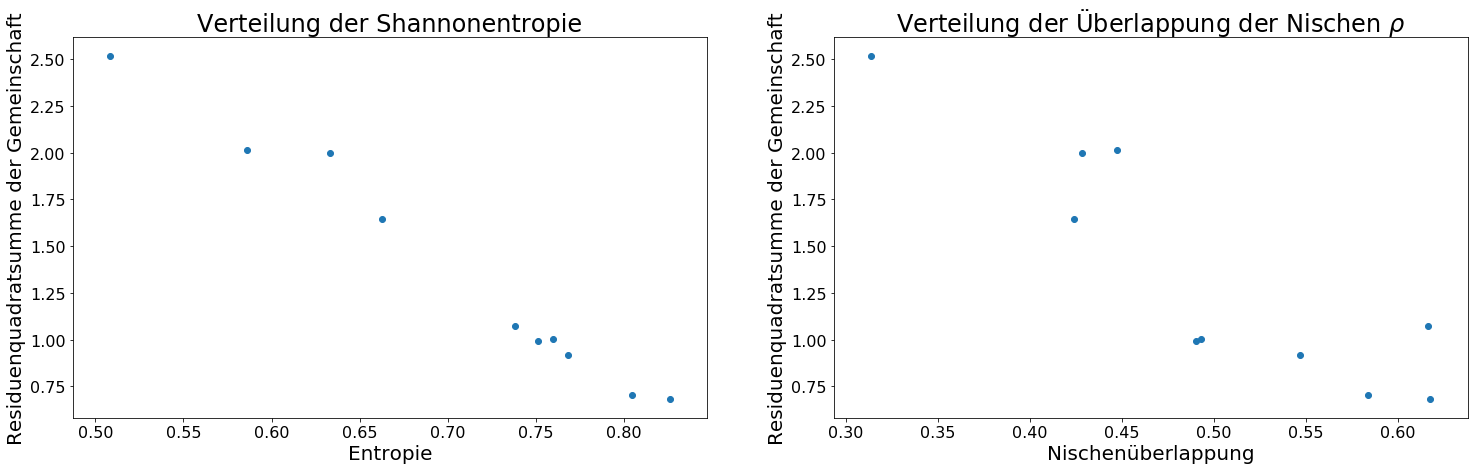

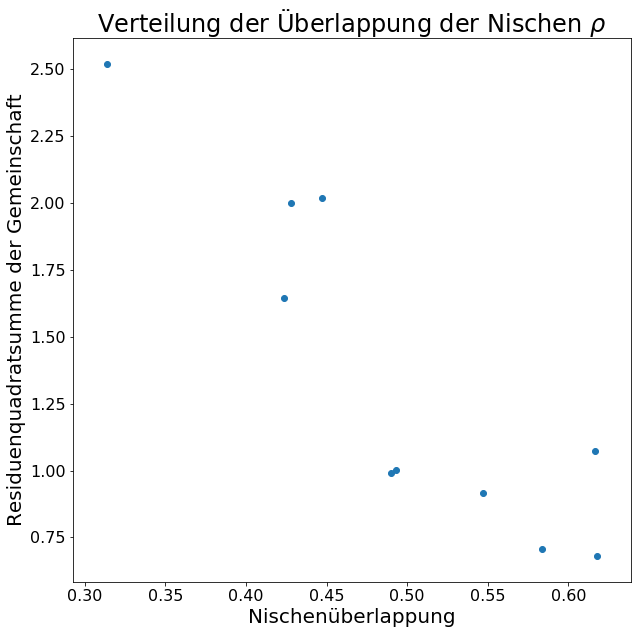

Korrelation von Overlap und RSS von allen:
 [[ 1.         -0.89408429]
 [-0.89408429  1.        ]] 

[7.967105711405355, 5.550539164287625, 7.089157290110024, 8.859811351184096, 9.489456959207354, 7.793994830202272, 10.052876867748038, 18.542456817224693, 12.76791728993254, 5.493473945219598]


In [15]:
#Alle Rechnungen überprüfen

fig, axes = plt.subplots(nrows=1, ncols=2, figsize= (25,7))

keys1= list(sh_m_dict_leben.keys())
values1 = list(sh_m_dict_leben.values())
#print(len(values1))
#print(values1)

keys2= list(overlap_dict.keys())
values2= list(overlap_dict.values())

axes[0].scatter(keys1,values1)
axes[0].set_title("Verteilung der Shannonentropie")
axes[0].set(xlabel="Entropie", ylabel="Überlebende Spezies")
axes[1].scatter(keys2,values2)
axes[1].set_title(r"Verteilung der Überlappung der Nischen $\rho$")
axes[1].set(xlabel="Nischenüberlappung", ylabel="Überlebende Spezies")

#plt.savefig(f"img/Überlebende(von{ns}Spezies,{nr}RessourcenMitRangeVon{wie_lange})gegenEntropie.png")  #für den Versuch 10 mehr Ressourcen als Spezies
plt.show()
print("Korrelation von Überlebenden und Entropie:\n", np.corrcoef(keys1,values1),"\n")
print("Korrelation von Überlebenden und Nischenüberlappung:\n", np.corrcoef(keys2,values2),"\n")




keys2_2 = list(rss_gegen_leben.keys())
#values2_2 = list(rss_gegen_leben.values())
plt.figure(figsize = (10,10))
plt.scatter(keys2_2,values1)
plt.title("Verteilung der Residuenquadratsummen")
plt.ylabel("Überlebende")
plt.xlabel(r"Residuenquadratsumme")

#plt.savefig(f"img/ResiduenquadartsummenGegenÜberlebende(von{ns}Spezies,{nr}RessourcenMitRangeVon{wie_lange}).png") 
plt.show()
print("Korrelation von Überlebenden und RSS:\n", np.corrcoef(keys2_2,values1,"\n"))

keys2_2 = list(rss_gegen_leben.keys())
#values2_2 = list(rss_gegen_leben.values())
plt.figure(figsize = (10,10))
plt.scatter(keys2_2,values2)
plt.title("Verteilung der Shannonentropie")
plt.ylabel("Überlebende")
plt.xlabel(r"Residuenquadratsumme")

#plt.savefig(f"img/Nischenüberlappung gegen Entropie (von {ns} Spezies, {nr} Ressourcen mit Range von {wie_lange}).png") 
plt.show()



# fig, axes = plt.subplots(nrows=1, ncols=2, figsize= (25,7))

key_entr = rss_allgemein_gegen_entropie.keys()
value_alleRss = rss_allgemein_gegen_entropie.values()
# plt.figure(figsize = (10,10))
# plt.scatter(key_entr,value_alleRss)
# plt.title("Verteilung der Shannonentropie")
# plt.ylabel("Residuenquadratsumme der Gemeinschaft")
# plt.xlabel(r"Entropie")
# plt.savefig(f"img/RSSAllgemeinGegenEntropie(von{ns}Spezies,{nr}RessourcenMitRangeVon{wie_lange}).png") 
# plt.show()

print("Korrelation von Entropie und RSS von allen:\n", np.corrcoef(list(key_entr),list(value_alleRss),"\n"))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize= (25,7))
key_overlap = rss_allgemein_gegen_overlap.keys()
value2_alleRss = rss_allgemein_gegen_overlap.values()

axes[0].scatter(key_entr,value_alleRss)
axes[0].set_title("Verteilung der Shannonentropie")
axes[0].set(xlabel="Entropie", ylabel="Residuenquadratsumme der Gemeinschaft")
axes[1].scatter(key_overlap,value2_alleRss)
axes[1].set_title(r"Verteilung der Überlappung der Nischen $\rho$")
axes[1].set(xlabel="Nischenüberlappung", ylabel="Residuenquadratsumme der Gemeinschaft")
#plt.savefig(f"img/RSSAllgemeinGegenEntropieNischenüberlappung(von{ns}Spezies,{nr}RessourcenMitRangeVon{wie_lange}).png") 
plt.show()

plt.figure(figsize = (10,10))
plt.scatter(key_overlap,value2_alleRss)
plt.title(r"Verteilung der Überlappung der Nischen $\rho$")
plt.ylabel("Residuenquadratsumme der Gemeinschaft")
plt.xlabel("Nischenüberlappung")
#plt.savefig(f"img/RSSAllgemeinGegenNischenüberlappung(von{ns}Spezies,{nr}RessourcenMitRangeVon{wie_lange}).png") 
plt.show()

print("Korrelation von Overlap und RSS von allen:\n", np.corrcoef(list(key_overlap),list(value2_alleRss)),"\n")
print(keys2_2)

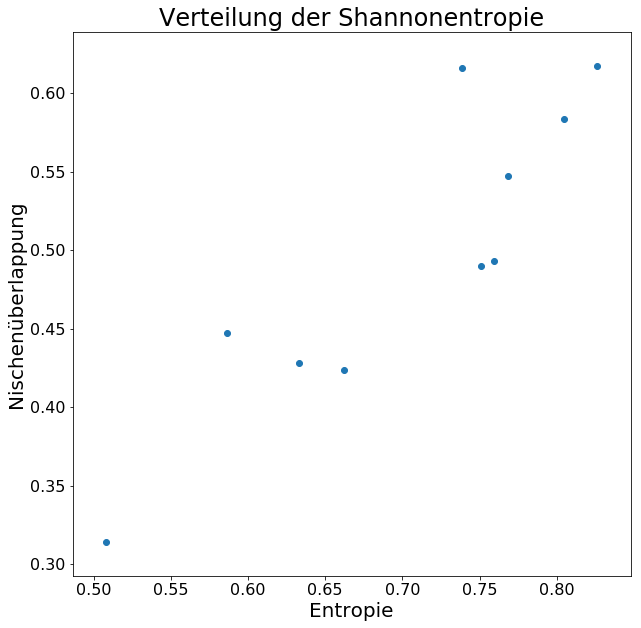

Korrelation zwischen Nischenüberlappung und Entropien:
 [[1.         0.89107913]
 [0.89107913 1.        ]]


In [16]:
#Entropie gegen die Nischenüberlaüüung

keys3 = list(ent_gegen_overlap_dict.keys())
values3 = list(ent_gegen_overlap_dict.values())
plt.figure(figsize = (10,10))
plt.scatter(keys3,values3)
plt.title("Verteilung der Shannonentropie")
plt.xlabel("Entropie")
plt.ylabel(r"Nischenüberlappung")

#plt.savefig(f"img/NischenüberlappungGegenEntropie(von{ns}Spezies,{nr}RessourcenMitRangevon{wie_lange})s.png") 
plt.show()

Korrelation = np.corrcoef(keys3,values3)
print("Korrelation zwischen Nischenüberlappung und Entropien:\n", Korrelation)

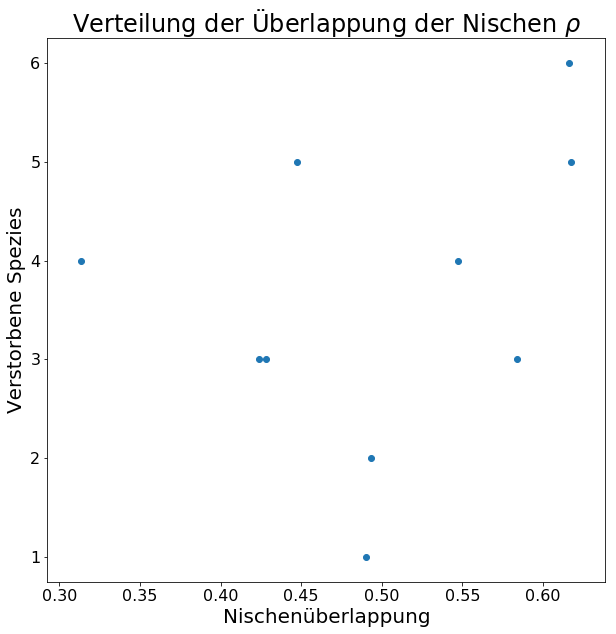

Korrelation von Toten und Nischenüberlappung:
 [[1.         0.29541018]
 [0.29541018 1.        ]] 



In [17]:
#Entropie gegen die Nischenüberlaüüung

keys4 = list(overlap_tot_dict.keys())
values4 = list(overlap_tot_dict.values())
plt.figure(figsize = (10,10))
plt.scatter(keys4,values4)
plt.title(r"Verteilung der Überlappung der Nischen $\rho$")
plt.xlabel("Nischenüberlappung")
plt.ylabel("Verstorbene Spezies")

#plt.savefig(f"img/Nischenüberlappung(tot)gegenEntropie(von{ns}Spezies,{nr}RessourcenMitRangeVon{wie_lange}).png")   
plt.show()
print("Korrelation von Toten und Nischenüberlappung:\n", np.corrcoef(keys4,values4),"\n")


Korrelation von Überlebenden und Toten:
 [[ 1. -1.]
 [-1.  1.]] 

6.5 1.707825127659933
3.5 1.707825127659933


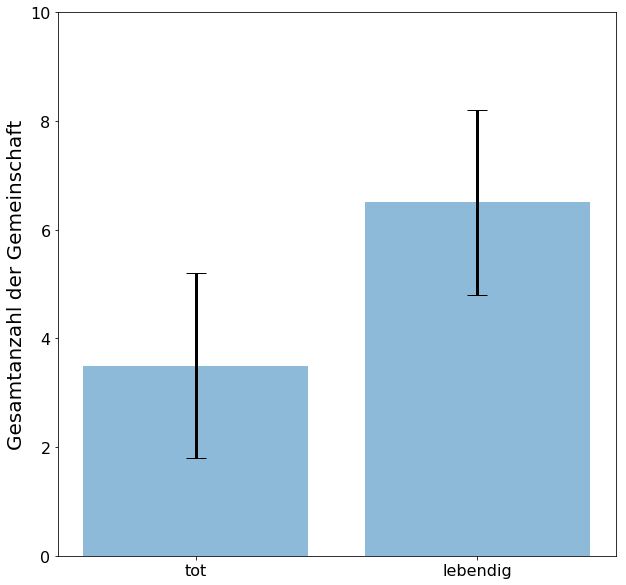

In [18]:
key_leben = list(leben_tot.keys())
value_tot = list(leben_tot.values())

print("Korrelation von Überlebenden und Toten:\n", np.corrcoef(key_leben, value_tot),"\n")

kleben = np.mean(key_leben)
kleben_std = np.std(key_leben)
vtot = np.mean(value_tot)
vtot_std = np.std(value_tot)
error = [kleben_std, vtot_std]
print(kleben, kleben_std)
print(vtot,vtot_std)
plt.figure(figsize = (10,10))
x = "tot","lebendig"
plt.ylabel("Gesamtanzahl der Gemeinschaft")
plt.ylim(0,ns)
plt.bar(x, (vtot,kleben), yerr = error, align='center', alpha=0.5, ecolor='black', capsize=10)
#plt.savefig(f"img/VergleichÜberlebendeUndTote(von{ns}Spezies,{nr}RessourcenMitRangeVon{wie_lange}).png")
plt.show()

## 3.4    Invasionsanalyse

In [26]:

print(len(invader))
print(np.shape(invader))
#print("\n",gencrossfeeding_matrices)
#nicheoverlapofCM_invader = [niche_overlap(i) for i in invader]
niche_overlap(invader)

11
(11, 10)


0.28295847943621644

In [25]:
ö = invader[0]
ö

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.42737818, 0.28448839, 0.28813343, 0.        ])

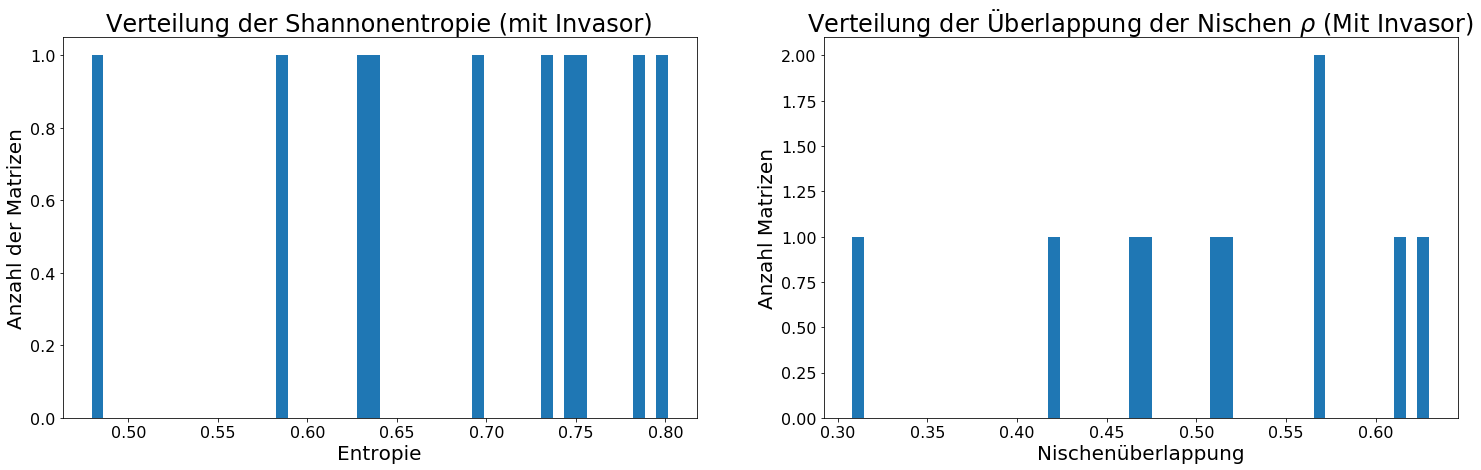

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize= (25,7))

axes[0].hist(ShannonEntropyOfCM_invader,bins=50)
axes[0].set_title("Verteilung der Shannonentropie (mit Invasor)")
axes[0].set(xlabel="Entropie", ylabel="Anzahl der Matrizen")
axes[1].hist(nicheoverlapofCM_invader, bins=50)
axes[1].set_title(r"Verteilung der Überlappung der Nischen $\rho$ (Mit Invasor)")
axes[1].set(xlabel="Nischenüberlappung", ylabel="Anzahl Matrizen")
#plt.savefig(f"img/INVASIONEntropieNachAnzahlDerMatrizenUndNischenüberlappungRange{wie_lange}Und{ns}SUnd{nr}R.png")
plt.show()

10 (10,)


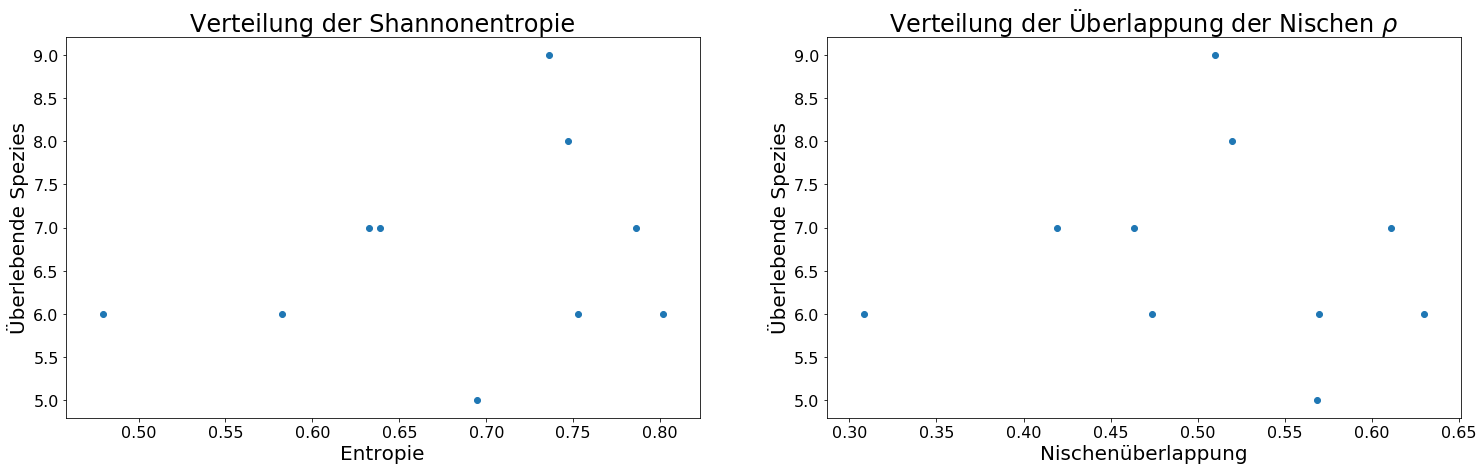

Korrelation nach Invasion von Überlebenden und Entropie:
 [[1.         0.25338731]
 [0.25338731 1.        ]] 

Korrelation nach Invasion von Überlebenden und Nischenüberlappung:
 [[ 1.         -0.05651502]
 [-0.05651502  1.        ]] 

10


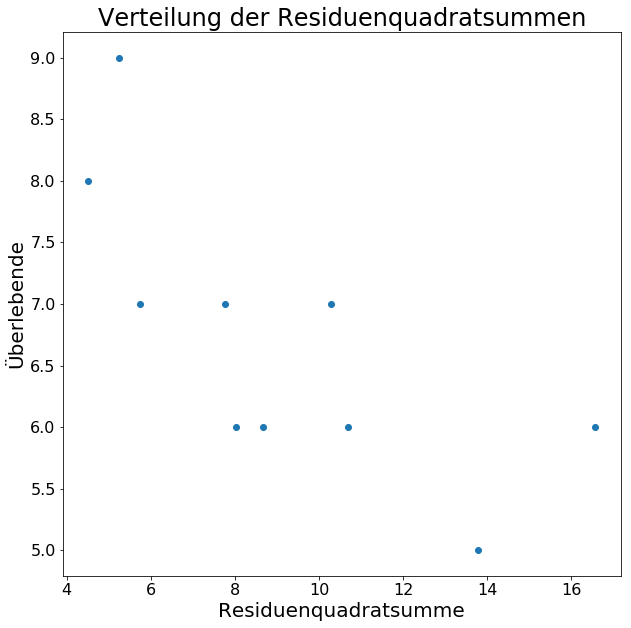

Korrelation von Überlebenden und RSS:
 [[ 1.         -0.72892134]
 [-0.72892134  1.        ]]


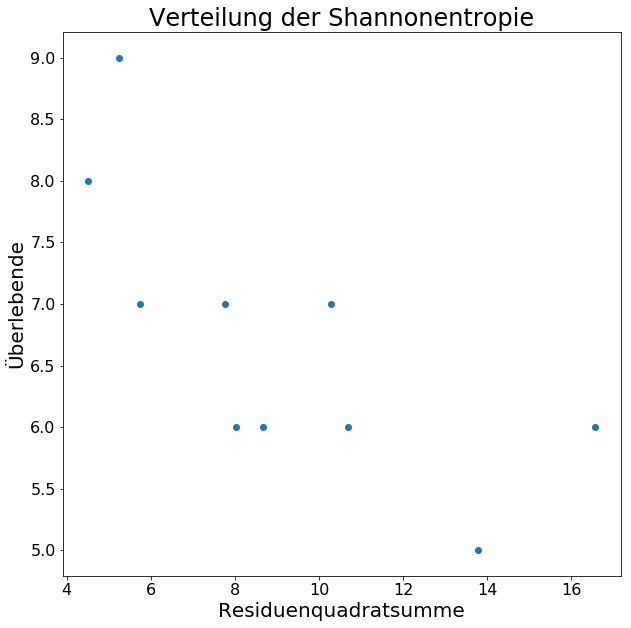

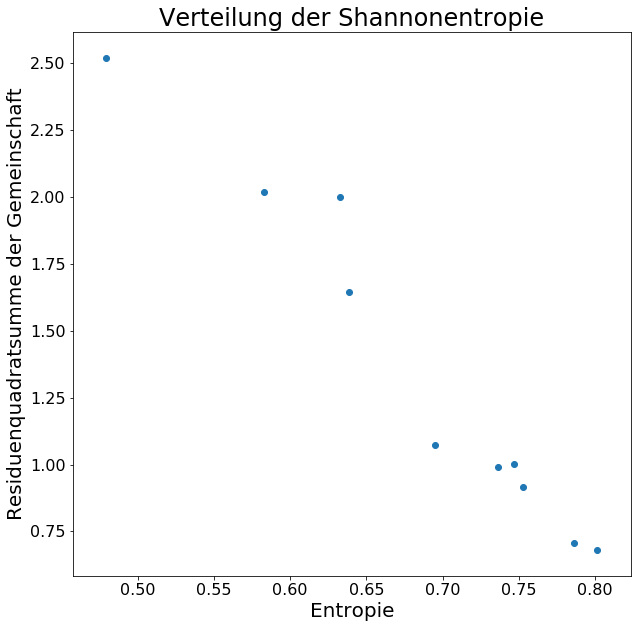

Korrelation nach Invasion von Entropie und RSS von allen:
 [[ 1.         -0.97681538]
 [-0.97681538  1.        ]]


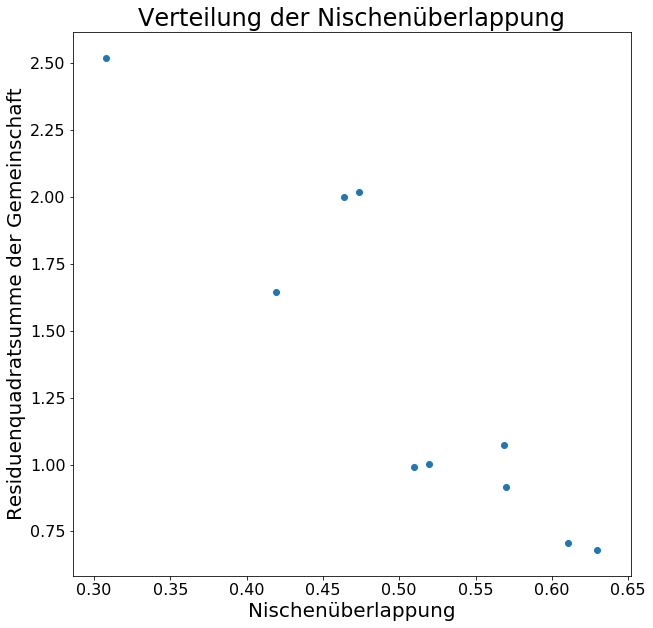

Korrelation nach Invasion von Overlap und RSS von allen:
 [[ 1.         -0.91054072]
 [-0.91054072  1.        ]] 



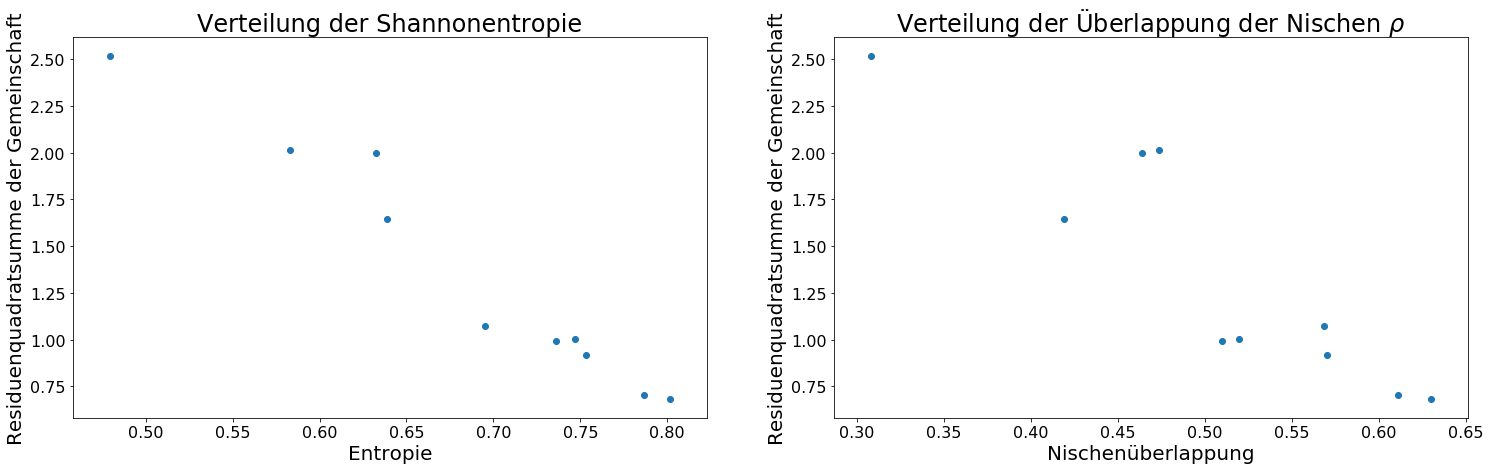

In [23]:
#Alle Rechnungen überprüfen

fig, axes = plt.subplots(nrows=1, ncols=2, figsize= (25,7))

keys1= list(Zsh_m_dict_leben.keys())
#print(len(keys1),np.shape(keys1))
values1 = list(Zsh_m_dict_leben.values())
print(len(values1),np.shape(values1))
#print(values1)

keys2= list(Zoverlap_dict.keys())
values2= list(Zoverlap_dict.values())

axes[0].scatter(keys1,values1)
axes[0].set_title("Verteilung der Shannonentropie")
axes[0].set(xlabel="Entropie", ylabel="Überlebende Spezies")
axes[1].scatter(keys2,values2)
axes[1].set_title(r"Verteilung der Überlappung der Nischen $\rho$")
axes[1].set(xlabel="Nischenüberlappung", ylabel="Überlebende Spezies")


#plt.savefig(f"img/INVASIONÜberlebende(von{ns}Spezies,{nr}RessourcenMitRangeVon{wie_lange})gegenEntropie.png")
plt.show()
print("Korrelation nach Invasion von Überlebenden und Entropie:\n", np.corrcoef(keys1,values1),"\n")
print("Korrelation nach Invasion von Überlebenden und Nischenüberlappung:\n", np.corrcoef(keys2,values2),"\n")




# keys2_2 = list(Zrss_gegen_leben.keys())
# #values2_2 = list(rss_gegen_leben.values())
# plt.figure(figsize = (10,10))
# print(len(keys2_2))
# plt.scatter(keys2_2,values1)
# plt.title("Verteilung der Residuenquadratsummen")
# plt.ylabel("Überlebende")
# plt.xlabel(r"Residuenquadratsumme")

# plt.savefig(f"img/ResiduenquadartsummenGegenÜberlebende(von{ns}Spezies,{nr}RessourcenMitRangeVon{wie_lange}).png") 
# plt.show()
# print("Korrelation von Überlebenden und RSS:\n", np.corrcoef(keys2_2,values1,"\n"))

# keys2_2 = list(Zrss_gegen_leben.keys())
# #values2_2 = list(rss_gegen_leben.values())
# plt.figure(figsize = (10,10))
# plt.scatter(keys2_2,values2)
# plt.title("Verteilung der Shannonentropie")
# plt.ylabel("Überlebende")
# plt.xlabel(r"Residuenquadratsumme")

# plt.savefig(f"img/Nischenüberlappung gegen Entropie (von {ns} Spezies, {nr} Ressourcen mit Range von {wie_lange}).png") 
# plt.show()


key_entr = list(Zrss_allgemein_gegen_entropie.keys())
value_alleRss = list(Zrss_allgemein_gegen_entropie.values())
# plt.figure(figsize = (10,10))
# plt.scatter(key_entr,value_alleRss)
# plt.title("Verteilung der Shannonentropie")
# plt.ylabel("Residuenquadratsumme der Gemeinschaft")
# plt.xlabel(r"Entropie")
# #plt.savefig(f"img/Nischenüberlappung gegen Entropie (von {ns} Spezies, {nr} Ressourcen mit Range von {wie_lange}).png") 
# #plt.savefig(f"img/INVASIONRSSAllgemeinGegenEntropie(von{ns}Spezies,{nr}RessourcenMitRangeVon{wie_lange}).png") 
# plt.show()

print("Korrelation nach Invasion von Entropie und RSS von allen:\n", np.corrcoef(list(key_entr),list(value_alleRss),"\n"))

key_overlap = list(Zrss_allgemein_gegen_overlap.keys())
value2_alleRss = list(Zrss_allgemein_gegen_overlap.values())
# plt.figure(figsize = (10,10))
# plt.scatter(key_overlap,value2_alleRss)
# plt.title("Verteilung der Nischenüberlappung")
# plt.ylabel("Residuenquadratsumme der Gemeinschaft")
# plt.xlabel("Nischenüberlappung")
# #plt.savefig(f"img/Nischenüberlappung gegen Entropie (von {ns} Spezies, {nr} Ressourcen mit Range von {wie_lange}).png") 
# #plt.savefig(f"img/INVASIONRSSAllgemeinGegenNischenüberlappung(von{ns}Spezies,{nr}RessourcenMitRangeVon{wie_lange}).png") 
# plt.show()

print("Korrelation nach Invasion von Overlap und RSS von allen:\n", np.corrcoef(list(key_overlap),list(value2_alleRss)),"\n")


fig, axes = plt.subplots(nrows=1, ncols=2, figsize= (25,7))
axes[0].scatter(key_entr,value_alleRss)
axes[0].set_title("Verteilung der Shannonentropie")
axes[0].set(xlabel="Entropie", ylabel="Residuenquadratsumme der Gemeinschaft")
axes[1].scatter(key_overlap,value2_alleRss)
axes[1].set_title(r"Verteilung der Überlappung der Nischen $\rho$")
axes[1].set(xlabel="Nischenüberlappung", ylabel="Residuenquadratsumme der Gemeinschaft")
#plt.savefig(f"img/INVASIONRSSAllgemeinGegenEntropieNischenüberlappung(von{ns}Spezies,{nr}RessourcenMitRangeVon{wie_lange}).png") 
plt.show()


In [17]:
keys3 = list(Zent_gegen_overlap_dict.keys())
values3 = list(Zent_gegen_overlap_dict.values())
plt.figure(figsize = (10,10))
plt.scatter(keys3,values3)
plt.title("Verteilung der Shannonentropie")
plt.xlabel("Entropie")
plt.ylabel(r"Verteilung der Überlappung der Nischen $\rho$")

plt.savefig(f"img/INVASIONNischenüberlappungGegenEntropie(von{ns}Spezies,{nr}RessourcenMitRangevon{wie_lange}).png") 
plt.show()

Korrelation = np.corrcoef(keys3,values3)
print("Korrelation nach Invasion von Entropie und Nischenüberlappung",Korrelation)

Korrelation nach Invasion von Entropie und Nischenüberlappung [[1.         0.99151546]
 [0.99151546 1.        ]]


Korrelation nach Invasion von Überlebenden und Toten:
 [[ 1.         -0.21689927]
 [-0.21689927  1.        ]] 

70.42857142857143 15.47216064749978
27.685714285714287 10.772375858307816


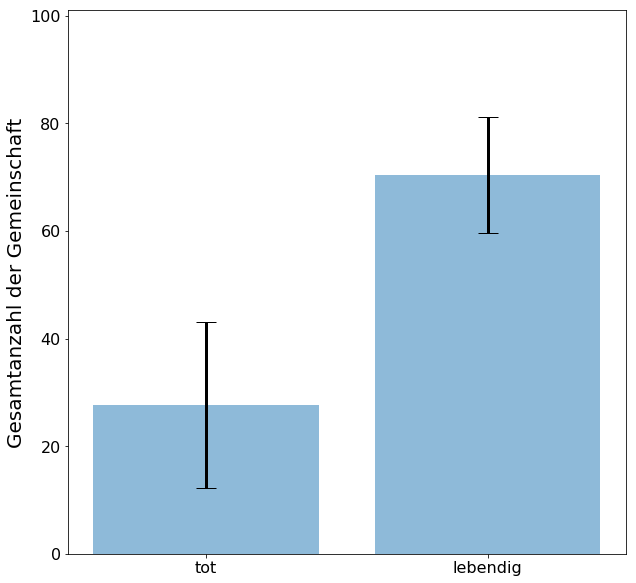

In [8]:
key_leben = list(Zleben_tot.keys())
value_tot = list(Zleben_tot.values())

print("Korrelation nach Invasion von Überlebenden und Toten:\n", np.corrcoef(key_leben, value_tot),"\n")

kleben = np.mean(key_leben)
kleben_std = np.std(key_leben)
vtot = np.mean(value_tot)
vtot_std = np.std(value_tot)
error = [kleben_std, vtot_std]
print(kleben, kleben_std)
print(vtot,vtot_std)
plt.figure(figsize = (10,10))
x = "tot","lebendig"
plt.ylabel("Gesamtanzahl der Gemeinschaft")
plt.ylim(0,len(invader))
plt.bar(x, (vtot,kleben), yerr = error, align='center', alpha=0.5, ecolor='black', capsize=10)
#plt.savefig(f"img/INVASIONVergleichÜberlebendeUndTote(von{ns}Spezies,{nr}RessourcenMitRangeVon{wie_lange}).png")
plt.show()

## Bilder nebeneinander

68.5 6.922186552431729
31.5 6.922186552431729


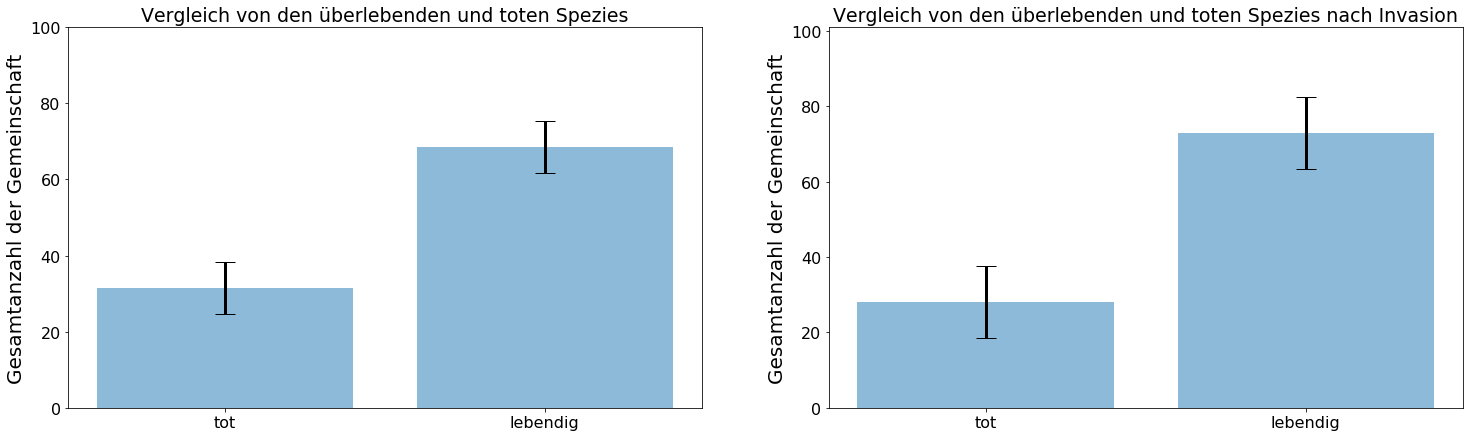

In [20]:
key_leben = list(leben_tot.keys())
value_tot = list(leben_tot.values())
kleben = np.mean(key_leben)
kleben_std = np.std(key_leben)
vtot = np.mean(value_tot)
vtot_std = np.std(value_tot)
error = [kleben_std, vtot_std]



key_leben2 = list(Zleben_tot.keys())
value_tot2 = list(Zleben_tot.values())
kleben2 = np.mean(key_leben2)
kleben_std2 = np.std(key_leben2)
vtot2 = np.mean(value_tot2)
vtot_std2 = np.std(value_tot2)
error2 = [kleben_std2, vtot_std2]

print(kleben, kleben_std)
print(vtot,vtot_std)

x = "tot","lebendig"

fig, axes = plt.subplots(nrows=1, ncols=2, figsize= (25,7))
key_overlap = rss_allgemein_gegen_overlap.keys()
value2_alleRss = rss_allgemein_gegen_overlap.values()

axes[0].bar(x, (vtot,kleben), yerr = error, align='center', alpha=0.5, ecolor='black', capsize=10)
axes[0].set_title("Vergleich von den überlebenden und toten Spezies", fontsize = 19)
axes[0].set( ylabel="Gesamtanzahl der Gemeinschaft")
axes[0].set_ylim(0,ns)
axes[1].bar(x, (vtot2,kleben2), yerr = error2, align='center', alpha=0.5, ecolor='black', capsize=10)
axes[1].set_title(r"Vergleich von den überlebenden und toten Spezies nach Invasion", fontsize=19)
axes[1].set(ylabel="Gesamtanzahl der Gemeinschaft")
axes[1].set_ylim(0,len(invader))
plt.savefig(f"img/OhneUndMitInvasionVergleichÜberlebendeUndTote(von{ns}Spezies,{nr}RessourcenMitRangeVon{wie_lange}).png") 
plt.show()

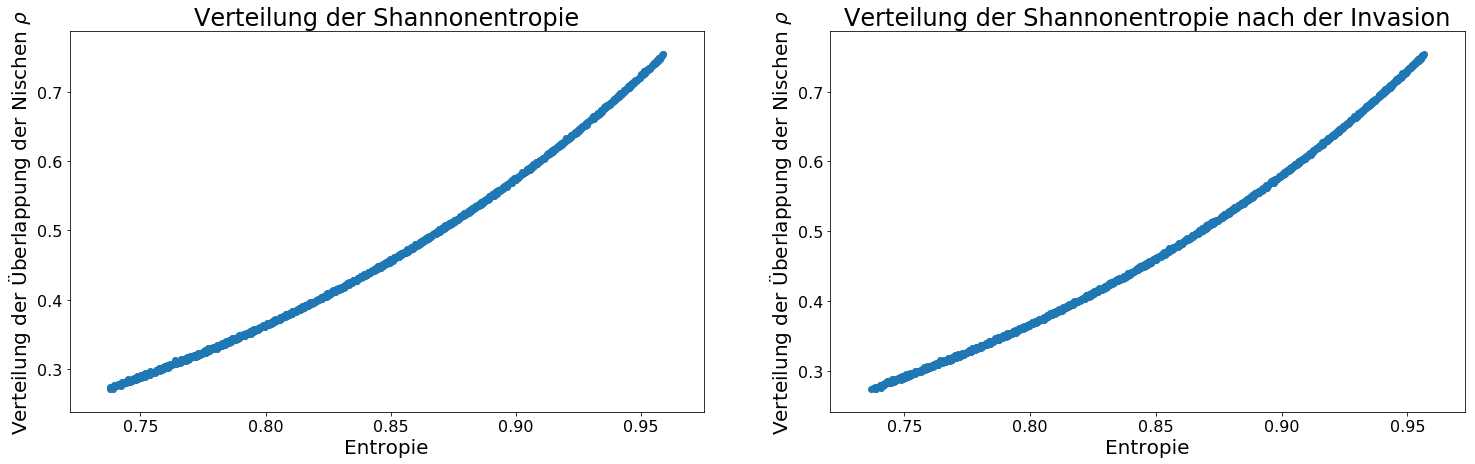

In [21]:
keys3 = list(ent_gegen_overlap_dict.keys())
values3 = list(ent_gegen_overlap_dict.values())

keys3_2 = list(Zent_gegen_overlap_dict.keys())
values3_2 = list(Zent_gegen_overlap_dict.values())



fig, axes = plt.subplots(nrows=1, ncols=2, figsize= (25,7))
axes[0].scatter(keys3,values3)
axes[0].set_title("Verteilung der Shannonentropie")
axes[0].set(xlabel="Entropie", ylabel=r"Nischenüberlappung")
axes[1].scatter(keys3_2,values3_2)
axes[1].set_title("Verteilung der Shannonentropie nach der Invasion")
axes[1].set(xlabel="Entropie", ylabel=r"Nischenüberlappung")
plt.savefig(f"img/OhneUndMitInvasionNischenüberlappungGegenEntropie(von{ns}Spezies,{nr}RessourcenMitRangeVon{wie_lange}).png") 
plt.show()
